## Proyecto de Machine Learning para predecir si un paciente tiene riesgo de sufrir una enfermedad cardiovascular

Se recolectó un dataset de Kaggle, el cual contiene información médica de más de 68mil pacientes, respecto a esto, nos planteamos el siguiente problema a resolver: Desarrollar un algoritmo de machine learning que, con base en el dataset
que provee información de los pacientes, nos indique si una persona tiene riesgo de
sufrir una enfermedad cardiovascular.

### Limpieza, mejora de la estructura para legibilidad y eliminación de columnas que aportan poca infromación

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('cardio_data.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


Definimos cuales son las columnas que menos información aportan: Con recomendación de un médico, llegamos a la conclusión de que tener peso, altura y bmi, resulta redundante para nuestros datos. Además también eliminar la edad en días para solo quedarnos con la edad en años.

In [ ]:
no_info = ['id','age','height', 'weight','bp_category']

Reestructuramos el dataset para darle mejor lectura y eliminamos las columnas que no aportan información

In [ ]:
df_clean = df.drop(no_info, axis=1)

In [ ]:
df_clean = df_clean[['age_years', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'cardio', 'bmi', 'bp_category_encoded']]

In [ ]:
df_clean = df_clean.rename(columns={'age_years': 'age'})
df_clean.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp_category_encoded
0,50,2,110,80,1,1,0,0,1,0,21.967120,Hypertension Stage 1
1,55,1,140,90,3,1,0,0,1,1,34.927679,Hypertension Stage 2
2,51,1,130,70,3,1,0,0,0,1,23.507805,Hypertension Stage 1
3,48,2,150,100,1,1,0,0,1,1,28.710479,Hypertension Stage 2
4,47,1,100,60,1,1,0,0,0,0,23.011177,Normal


Guardamos el dataset limpio y reestructurado para que pueda seguir trabajando el equipo.
Cabe resaltar que este dataset en particular no cuenta con valores Nulos, por lo que hizo su limpieza y reestructuración mucho más sencilla. 

### Análisis exploratorio de datos

In [ ]:
df = pd.read_csv('cardiovascular_clean.csv')
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp_category_encoded
0,50,2,110,80,1,1,0,0,1,0,21.967120,Hypertension Stage 1
1,55,1,140,90,3,1,0,0,1,1,34.927679,Hypertension Stage 2
2,51,1,130,70,3,1,0,0,0,1,23.507805,Hypertension Stage 1
3,48,2,150,100,1,1,0,0,1,1,28.710479,Hypertension Stage 2
4,47,1,100,60,1,1,0,0,0,0,23.011177,Normal


In [ ]:
#Cantidad de registros y variables (filas y columnas)
df.shape

(68205, 12)

In [ ]:
#Tipos de datos de cada columna
df.dtypes

age                      int64
gender                   int64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
gluc                     int64
smoke                    int64
alco                     int64
active                   int64
cardio                   int64
bmi                    float64
bp_category_encoded     object
dtype: object

In [ ]:
df.info

<bound method DataFrame.info of        age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0       50       2    110     80            1     1      0     0       1   
1       55       1    140     90            3     1      0     0       1   
2       51       1    130     70            3     1      0     0       0   
3       48       2    150    100            1     1      0     0       1   
4       47       1    100     60            1     1      0     0       0   
...    ...     ...    ...    ...          ...   ...    ...   ...     ...   
68200   52       2    120     80            1     1      1     0       1   
68201   61       1    140     90            2     2      0     0       1   
68202   52       2    180     90            3     1      0     1       0   
68203   61       1    135     80            1     2      0     0       0   
68204   56       1    120     80            2     1      0     0       1   

       cardio        bmi   bp_category_encoded  
0     

In [ ]:
#Cálculo de medidas de tendencia central

age_mean=df['age'].mean()
bmi_mean=df['bmi'].mean()
ap_hi_mean=df['ap_hi'].mean()
ap_lo_mean=df['ap_lo'].mean()

print("Medias")
print("Edad: ",age_mean)
print("bmi: ",bmi_mean)
print("ap_hi: ",ap_hi_mean)
print("ap_lo: ",ap_lo_mean)

moda_gender=df['gender'].mode()
moda_cholesterol=df['cholesterol'].mode()
moda_gluc=df['gluc'].mode()
moda_smoke=df['smoke'].mode()
moda_alco=df['alco'].mode()
moda_bp_category_encoded=df['bp_category_encoded'].mode()
moda_active=df['active'].mode()
moda_cardio=df['cardio'].mode()

print("\nModas")
print("Género: ",moda_gender[0])
print("Colesterol: ",moda_cholesterol[0])
print("Glucosa: ",moda_gluc[0])
print("Smoke: ",moda_smoke[0])
print("Alcohol: ",moda_alco[0])
print("bp category: ",moda_bp_category_encoded[0])
print("Active: ",moda_active[0])
print("Cardio: ",moda_cardio[0])

age_std=df['age'].std()
bmi_std=df['bmi'].std()
ap_hi_std=df['ap_hi'].std()
ap_lo_std=df['ap_lo'].std()

print("\nDesviación estándar")
print("Edad: ",age_std)
print("bmi: ",bmi_std)
print("ap_hi: ",ap_hi_std)
print("ap_lo: ",ap_lo_std)

Medias
Edad:  52.823634630892165
bmi:  27.51051323524793
ap_hi:  126.43492412579722
ap_lo:  81.26392493218972

Modas
Género:  1
Colesterol:  1
Glucosa:  1
Smoke:  0
Alcohol:  0
bp category:  Hypertension Stage 1
Active:  1
Cardio:  0

Desviación estándar
Edad:  6.769909460964478
bmi:  6.026497044315445
ap_hi:  15.961684928767355
ap_lo:  9.143984800256652


Aquí se notan varias tendencias interesantes:
* La edad de las personas evaluadas en promedio son adultos mayores
* La presión arterial no está tan elevada en promedio
* Hay más mujeres en el dataset (1: Female)
* La mayoría de laas personas tienen el colesterol en niveles normales (1: Normal)
* De igual forma la glucosa (1: Normal)
* La mayoría de las personas no fuma ni toma alcohol, además hacen actividad física

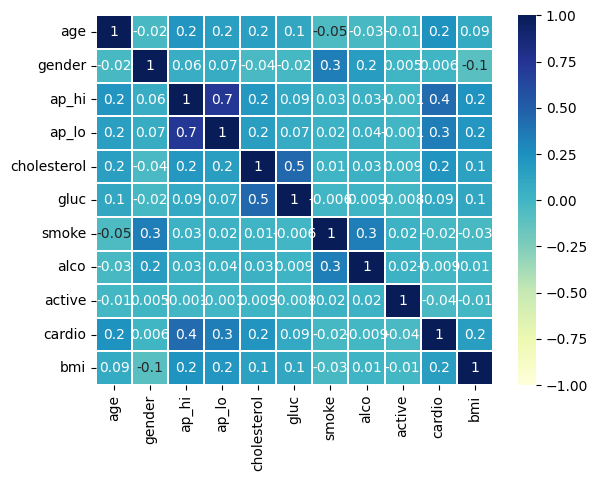

In [ ]:
#Correlaciones
df2=df[['age','gender','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio','bmi']]
ax = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=0.05, fmt='.1g')

In [ ]:
#Tabla de frecuencias de edades, para identificar el grupo de edad al que pertenece el grueso de la muestra.
ages = df['age']
segmentos=pd.cut(ages,5)
df['age'].groupby(segmentos).count()

age
(28.965, 36.0]        4
(36.0, 43.0]       8566
(43.0, 50.0]      15507
(50.0, 57.0]      24649
(57.0, 64.0]      19479
Name: age, dtype: int64

Con esta tabla de frecuencia confirmamos que la mayoría de personas de las que se tienen datos son mayores de 40 años

[Text(0.5, 1.0, 'Edades de los pacientes'),
 Text(0.5, 0, 'edad'),
 Text(0, 0.5, 'conteo')]

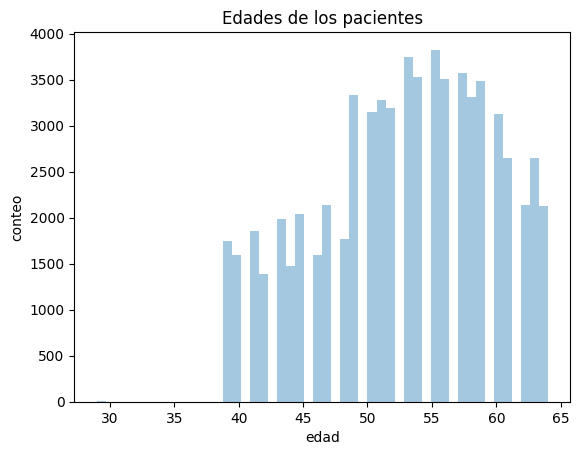

In [ ]:
#Histograma de edades
hist_age = sns.distplot(df['age'], kde=False)
hist_age.set(title='Edades de los pacientes', xlabel='edad', ylabel='conteo')

De forma visual confirmamos la afirmación anterior respecto a la edad de los pacientes

In [ ]:
counts_bp=df["bp_category_encoded"].value_counts()
counts_bp

bp_category_encoded
Hypertension Stage 1    39750
Hypertension Stage 2    15937
Normal                   9417
Elevated                 3101
Name: count, dtype: int64

Como se observa la mayoría de pacientes se encuentran en hipertensión grado 1, esto debido a la guía médica de los estados unidos la cual es mucho más estricta que la de México (Información corroborada por el médico).

[Text(0.5, 0, 'Count')]

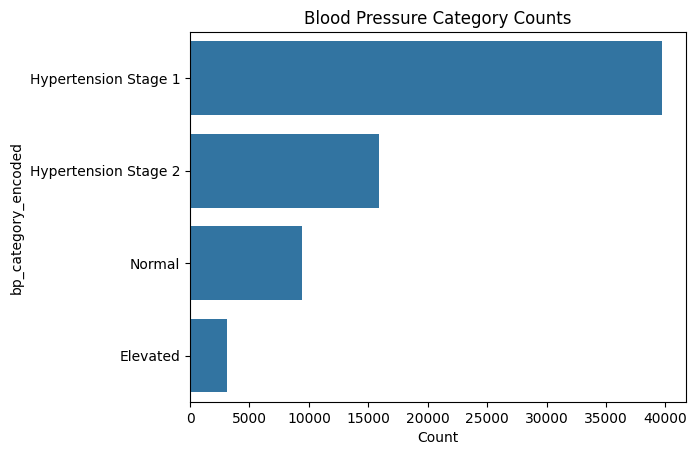

In [ ]:
ax = sns.barplot(y=counts_bp.index, x=counts_bp)
ax.set_title('Blood Pressure Category Counts')
ax.set(xlabel='Count')

**Análisis por categoría de presión sanguinea**

In [ ]:
#Se genera un dataframe por categoría
df_hs1 = df[df['bp_category_encoded']=='Hypertension Stage 1']
df_hs2 = df[df['bp_category_encoded']=='Hypertension Stage 2']
df_normal = df[df['bp_category_encoded']=='Normal']
df_elevated = df[df['bp_category_encoded']=='Elevated']


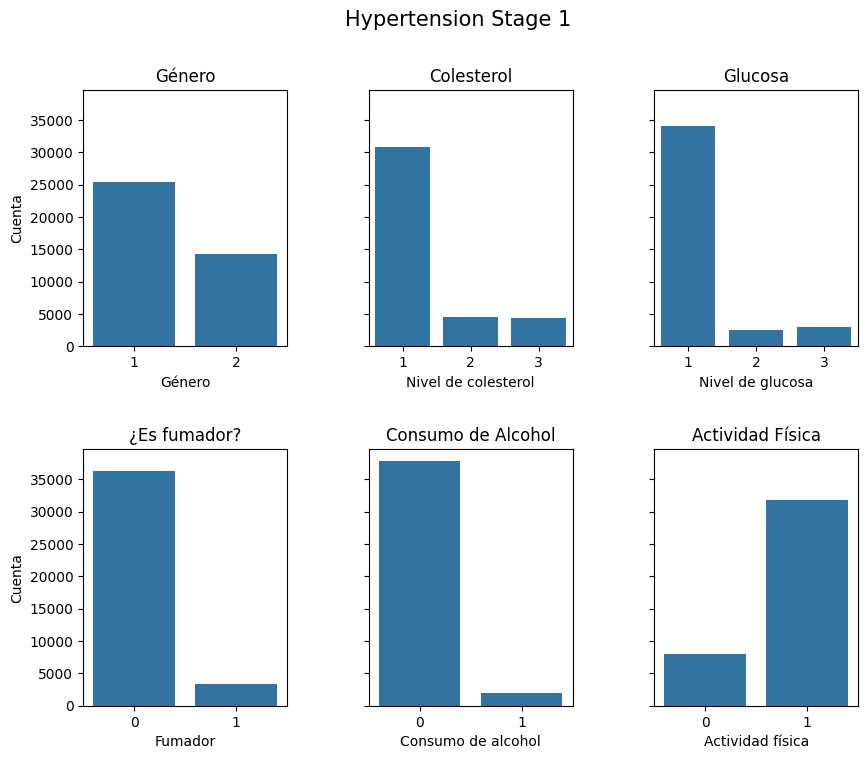

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

count_gender=df_hs1["gender"].value_counts()
count_cholesterol=df_hs1["cholesterol"].value_counts()
count_gluc=df_hs1["gluc"].value_counts()
count_smoke=df_hs1["smoke"].value_counts()
count_alco=df_hs1["alco"].value_counts()
count_active=df_hs1["active"].value_counts()

sns.barplot(x=count_gender.index, y=count_gender, ax=axes[0,0])
sns.barplot(x=count_cholesterol.index, y=count_cholesterol, ax=axes[0,1])
sns.barplot(x=count_gluc.index, y=count_gluc, ax=axes[0,2])
sns.barplot(x=count_smoke.index, y=count_smoke, ax=axes[1,0])
sns.barplot(x=count_alco.index, y=count_alco, ax=axes[1,1])
sns.barplot(x=count_active.index, y=count_active, ax=axes[1,2])

axes[0, 0].set(xlabel='Género', ylabel='Cuenta', title='Género')
axes[0, 1].set(xlabel='Nivel de colesterol', ylabel='Cuenta', title='Colesterol')
axes[0, 2].set(xlabel='Nivel de glucosa', ylabel='Cuenta',title='Glucosa')
axes[1, 0].set(xlabel='Fumador', ylabel='Cuenta', title='¿Es fumador?')
axes[1, 1].set(xlabel='Consumo de alcohol', ylabel='Cuenta', title='Consumo de Alcohol')
axes[1, 2].set(xlabel='Actividad física', ylabel='Cuenta', title='Actividad Física')

fig.suptitle('Hypertension Stage 1', fontsize=15);

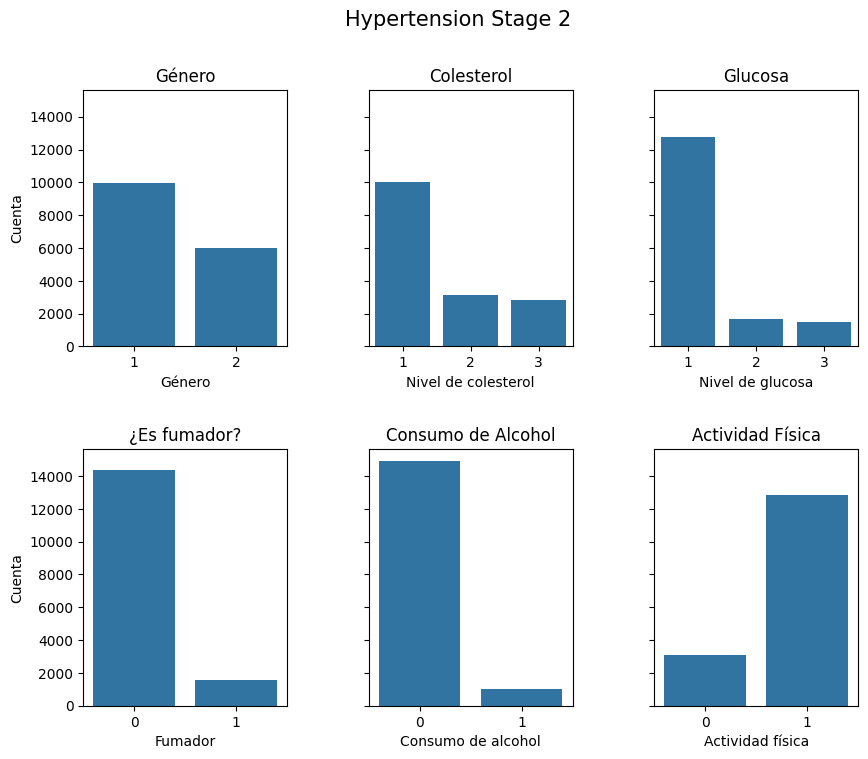

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

count_gender=df_hs2["gender"].value_counts()
count_cholesterol=df_hs2["cholesterol"].value_counts()
count_gluc=df_hs2["gluc"].value_counts()
count_smoke=df_hs2["smoke"].value_counts()
count_alco=df_hs2["alco"].value_counts()
count_active=df_hs2["active"].value_counts()

sns.barplot(x=count_gender.index, y=count_gender, ax=axes[0,0])
sns.barplot(x=count_cholesterol.index, y=count_cholesterol, ax=axes[0,1])
sns.barplot(x=count_gluc.index, y=count_gluc, ax=axes[0,2])
sns.barplot(x=count_smoke.index, y=count_smoke, ax=axes[1,0])
sns.barplot(x=count_alco.index, y=count_alco, ax=axes[1,1])
sns.barplot(x=count_active.index, y=count_active, ax=axes[1,2])

axes[0, 0].set(xlabel='Género', ylabel='Cuenta', title='Género')
axes[0, 1].set(xlabel='Nivel de colesterol', ylabel='Cuenta', title='Colesterol')
axes[0, 2].set(xlabel='Nivel de glucosa', ylabel='Cuenta',title='Glucosa')
axes[1, 0].set(xlabel='Fumador', ylabel='Cuenta', title='¿Es fumador?')
axes[1, 1].set(xlabel='Consumo de alcohol', ylabel='Cuenta', title='Consumo de Alcohol')
axes[1, 2].set(xlabel='Actividad física', ylabel='Cuenta', title='Actividad Física')

fig.suptitle('Hypertension Stage 2', fontsize=15);

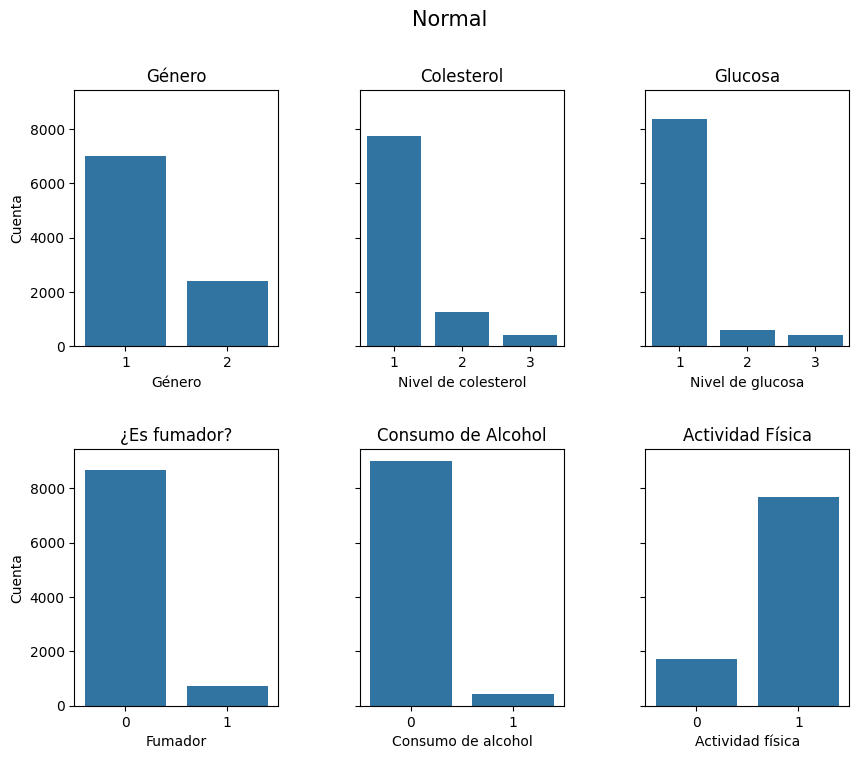

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

count_gender=df_normal["gender"].value_counts()
count_cholesterol=df_normal["cholesterol"].value_counts()
count_gluc=df_normal["gluc"].value_counts()
count_smoke=df_normal["smoke"].value_counts()
count_alco=df_normal["alco"].value_counts()
count_active=df_normal["active"].value_counts()

sns.barplot(x=count_gender.index, y=count_gender, ax=axes[0,0])
sns.barplot(x=count_cholesterol.index, y=count_cholesterol, ax=axes[0,1])
sns.barplot(x=count_gluc.index, y=count_gluc, ax=axes[0,2])
sns.barplot(x=count_smoke.index, y=count_smoke, ax=axes[1,0])
sns.barplot(x=count_alco.index, y=count_alco, ax=axes[1,1])
sns.barplot(x=count_active.index, y=count_active, ax=axes[1,2])

axes[0, 0].set(xlabel='Género', ylabel='Cuenta', title='Género')
axes[0, 1].set(xlabel='Nivel de colesterol', ylabel='Cuenta', title='Colesterol')
axes[0, 2].set(xlabel='Nivel de glucosa', ylabel='Cuenta',title='Glucosa')
axes[1, 0].set(xlabel='Fumador', ylabel='Cuenta', title='¿Es fumador?')
axes[1, 1].set(xlabel='Consumo de alcohol', ylabel='Cuenta', title='Consumo de Alcohol')
axes[1, 2].set(xlabel='Actividad física', ylabel='Cuenta', title='Actividad Física')

fig.suptitle('Normal', fontsize=15);

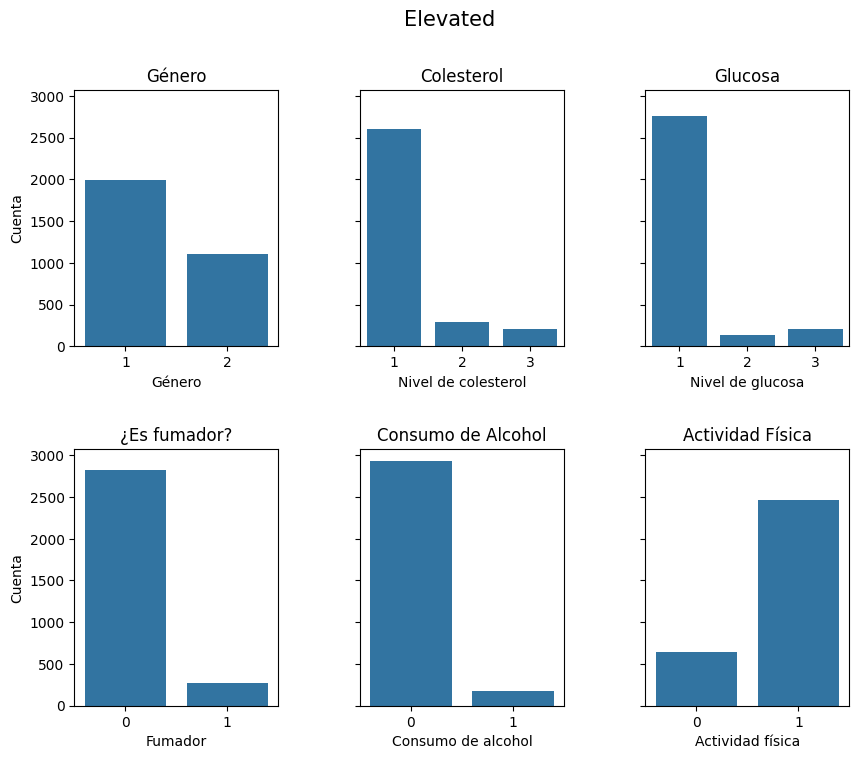

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

count_gender=df_elevated["gender"].value_counts()
count_cholesterol=df_elevated["cholesterol"].value_counts()
count_gluc=df_elevated["gluc"].value_counts()
count_smoke=df_elevated["smoke"].value_counts()
count_alco=df_elevated["alco"].value_counts()
count_active=df_elevated["active"].value_counts()

sns.barplot(x=count_gender.index, y=count_gender, ax=axes[0,0])
sns.barplot(x=count_cholesterol.index, y=count_cholesterol, ax=axes[0,1])
sns.barplot(x=count_gluc.index, y=count_gluc, ax=axes[0,2])
sns.barplot(x=count_smoke.index, y=count_smoke, ax=axes[1,0])
sns.barplot(x=count_alco.index, y=count_alco, ax=axes[1,1])
sns.barplot(x=count_active.index, y=count_active, ax=axes[1,2])

axes[0, 0].set(xlabel='Género', ylabel='Cuenta', title='Género')
axes[0, 1].set(xlabel='Nivel de colesterol', ylabel='Cuenta', title='Colesterol')
axes[0, 2].set(xlabel='Nivel de glucosa', ylabel='Cuenta',title='Glucosa')
axes[1, 0].set(xlabel='Fumador', ylabel='Cuenta', title='¿Es fumador?')
axes[1, 1].set(xlabel='Consumo de alcohol', ylabel='Cuenta', title='Consumo de Alcohol')
axes[1, 2].set(xlabel='Actividad física', ylabel='Cuenta', title='Actividad Física')

fig.suptitle('Elevated', fontsize=15);

De forma visual en las diferentes etapas de la hipertensión, podemos observar que nuestra población lleva una vida "Saludable" en su mayoría, por lo que hay que seleccionar bien qué variables nos serán útiles para los modelos de Machine learning, así que basándonos en la correlación que existe entre las variables independientes con el objetivo ("cardio") y en las visualizaciones del EDA, seleccionamos que nuestras variables independientes serán:
* Edad: *age*
* Presión sistólica: *ap_hi*
* Presión diastólica: *ap_lo*
* Si es fumador: *smoke*
* Colesterol: *cholesterol*
* Indice de masa corporal: *bmi*

### Implementación de algoritmos de Machine Learning

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

Para tener todos nuestros datos en formato numérico y no categórico, pasamos la variable que nos indica el nivel de hipertensión del paciente a números, como es gradual, poner numeros del 0 al 3 es correcto.

In [ ]:
dic_estado= {
  0: 'Elevated',
  1: 'Normal',
  2: 'Hypertension Stage 1',
  3: 'Hypertension Stage 2'
}

In [ ]:
df['Estado'] = df['bp_category_encoded'].replace(
  dic_estado.values(), # Lista de Strings
  dic_estado.keys() # Lista de Números
)

In [ ]:
cardiovascular=df.drop(columns=['bp_category_encoded'])
cardiovascular.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,Estado
0,50,2,110,80,1,1,0,0,1,0,21.97,2
1,55,1,140,90,3,1,0,0,1,1,34.93,3
2,51,1,130,70,3,1,0,0,0,1,23.51,2
3,48,2,150,100,1,1,0,0,1,1,28.71,3
4,47,1,100,60,1,1,0,0,0,0,23.01,1


Verificamos si este nuevo dato, nos otorga alguna correlación o cambio en los datos para ser tomado en cuenta al momento de entrenar nuestros modelos.

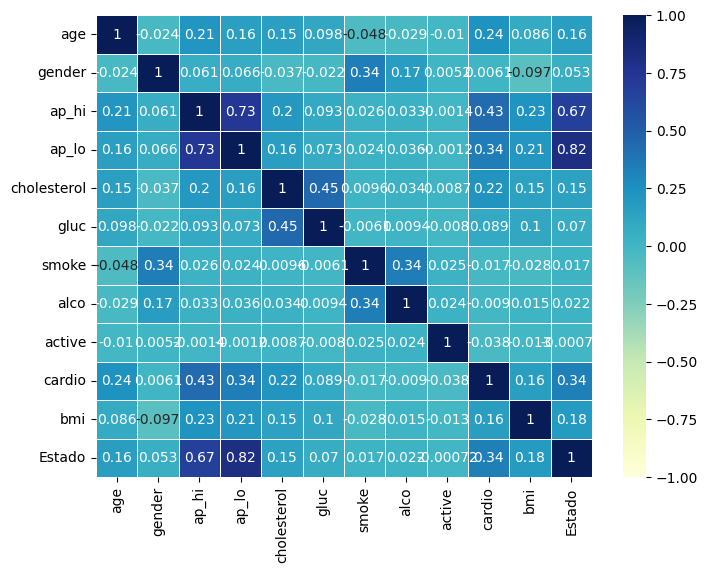

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cardiovascular.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Después de consultarlo con el especialista(médico), confirmamos que esta nueva variable se hace redundante con la presión arterial, así que no otorgaría una información significativa en nuestros modelos.

In [ ]:
X=cardiovascular[['age', 'ap_hi','ap_lo','smoke', 'cholesterol', 'bmi']]
Y=cardiovascular['cardio']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

Utilizamos lazyClassifier para verificar qué modelos hacen un mejor trabajo para nuestros datos, y a partir de aquí tomar una decisión respecto a los que vamos a implementar.

In [ ]:
# Inicializa LazyClassifier
clf = LazyClassifier(predictions=True)

# Ajusta el modelo y obtén los resultados
models = clf.fit(X_train, X_test, Y_train, Y_test)

# Imprime los resultados
print(models)

 97%|█████████▋| 28/29 [40:15<01:01, 61.56s/it]   

[LightGBM] [Info] Number of positive: 25286, number of negative: 25867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 51153, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494321 -> initscore=-0.022717
[LightGBM] [Info] Start training from score -0.022717


100%|██████████| 29/29 [40:16<00:00, 83.34s/it]

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.73               0.73     0.73      0.73   
SVC                                0.73               0.73     0.73      0.73   
XGBClassifier                      0.72               0.72     0.72      0.72   
AdaBoostClassifier                 0.72               0.72     0.72      0.72   
CalibratedClassifierCV             0.72               0.72     0.72      0.72   
LogisticRegression                 0.72               0.72     0.72      0.72   
NearestCentroid                    0.72               0.72     0.72      0.72   
LinearSVC                          0.72               0.72     0.72      0.72   
SGDClassifier                      0.72               0.72     0.72      0.72   
LinearDiscriminantAnalysis         0.72               0.72     0.72      0.72   
RidgeClassifier            

Nos muestra modelos que no conocemos y unos cuantos que sí. Basandonos en sus resultados y en los modelos conocidos decidimos implementar los siguientes modelos de forma individual para después comparar su eficacia:
* Naive Bayes
* Support Vector Machine (SVC)
* Regresión Logística
* Arboles de decisión

**Implementando Naive Bayes**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Inicializar el modelo Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo
nb_model.fit(X_train, Y_train)

# Predecir usando el conjunto de test
Y_pred = nb_model.predict(X_test)

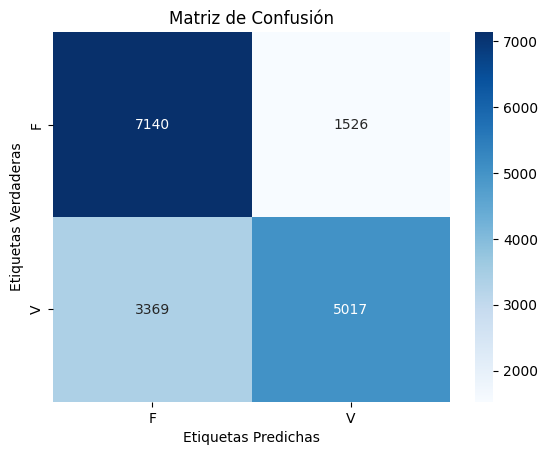

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

# Graficar la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['F', 'V'], yticklabels=['F', 'V'])

# Etiqueta los ejes y el título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')

# Muestra la matriz de confusión
plt.show()

In [ ]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(Y_test, Y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[7140 1526]
 [3369 5017]]
True positives: 5017
True negatives: 7140
False positives: 1526
False negative: 3369
Precision:71.293689889749%
Sensibilidad:59.825900310040545%
Especificidad:82.39095315024232%


**Validación de Naive Bayes con KFOLD**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# Usar k-fold cross validation (por ejemplo, k=5)
scores = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')

# Mostrar los resultados
print("Mean accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Mean accuracy: 0.7185103731397992
Standard Deviation: 0.002624563883764036


Para este modelo **Naive Bayes** Tenemos una precisión validada por kfold del 71.8% lo cual nos indica que el modelo predice si el paciente tiene riesgo de una enfermedad cardiovascular de forma efectiva.

**Implementando Support Vector Machine (SVC)**

In [ ]:
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.pipeline import make_pipeline

In [ ]:
SupportVectorMachine = SVC()
SupportVectorMachine.fit(X_train, Y_train)
y_pred = SupportVectorMachine.predict(X_test)

Ajustar y predecir con este modelo en particular es algo tardado.

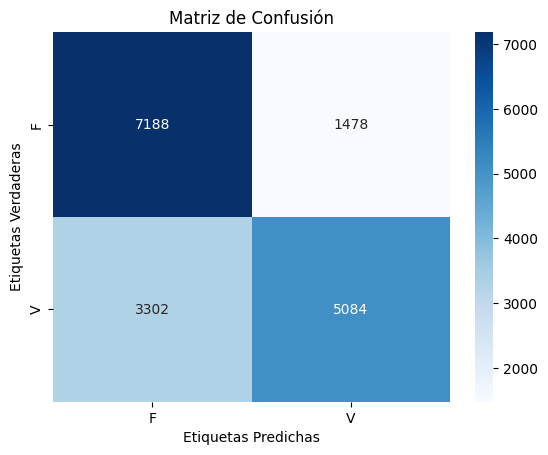

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Graficar la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['F', 'V'], yticklabels=['F', 'V'])

# Etiquetar los ejes y el título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')

# Muestra la matriz de confusión
plt.show()

In [43]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(Y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[7188 1478]
 [3302 5084]]
True positives: 5084
True negatives: 7188
False positives: 1478
False negative: 3302
Precision:71.96809758386114%
Sensibilidad:60.62485094204627%
Especificidad:82.94484191091622%


In [44]:
scores = cross_val_score(SupportVectorMachine, X, Y, cv=5, scoring='accuracy')

In [45]:
print("Precisión promedio: {:.4f}".format(scores.mean()))
print("Desviación estándar de la precisión:",(scores.std()))

Precisión promedio: 0.7235
Desviación estándar de la precisión: 0.00416943788556554


Para este modelo **SVC** Tenemos una precisión validada por kfold del 72.3% lo cual nos indica que el modelo predice si el paciente tiene riesgo de una enfermedad cardiovascular un poco mejor que el Naive Bayes.

**Implementando regresión logística**

In [46]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

Y_pred = log_reg.predict(X_test)

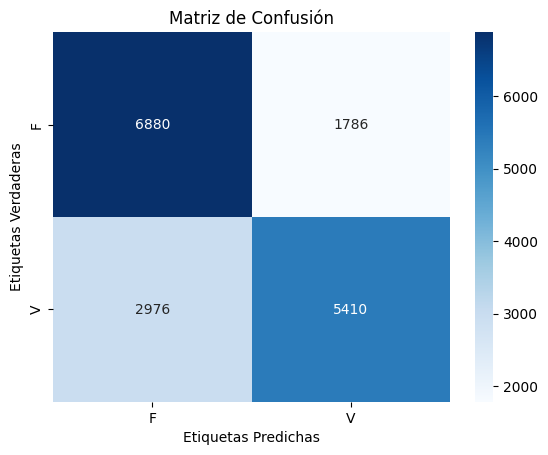

In [49]:
# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

# Graficar la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['F', 'V'], yticklabels=['F', 'V'])

# Etiqueta los ejes y el título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')

# Muestra la matriz de confusión
plt.show()

In [50]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(Y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[7188 1478]
 [3302 5084]]
True positives: 5084
True negatives: 7188
False positives: 1478
False negative: 3302
Precision:71.96809758386114%
Sensibilidad:60.62485094204627%
Especificidad:82.94484191091622%


**Validación de la regresión logistica con kfold**

In [52]:
scores = cross_val_score(log_reg, X, Y, cv=5, scoring='accuracy')

In [53]:
print("Precisión promedio: {:.4f}".format(scores.mean()))
print("Desviación estándar de la precisión:",(scores.std()))

Precisión promedio: 0.7247
Desviación estándar de la precisión: 0.0026492648632200954


Para este modelo **Regresión logística** Tenemos una precisión validada por kfold del 72.4% Hasta el momento este es el mejor modelo que hemos entrenado.

**Implementando Arboles de Decisión**

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [55]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [56]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Mostramos nuestro arbol, para decidir si una persona tiene o no riesgo de sufrir una enfermedad cardiovascular

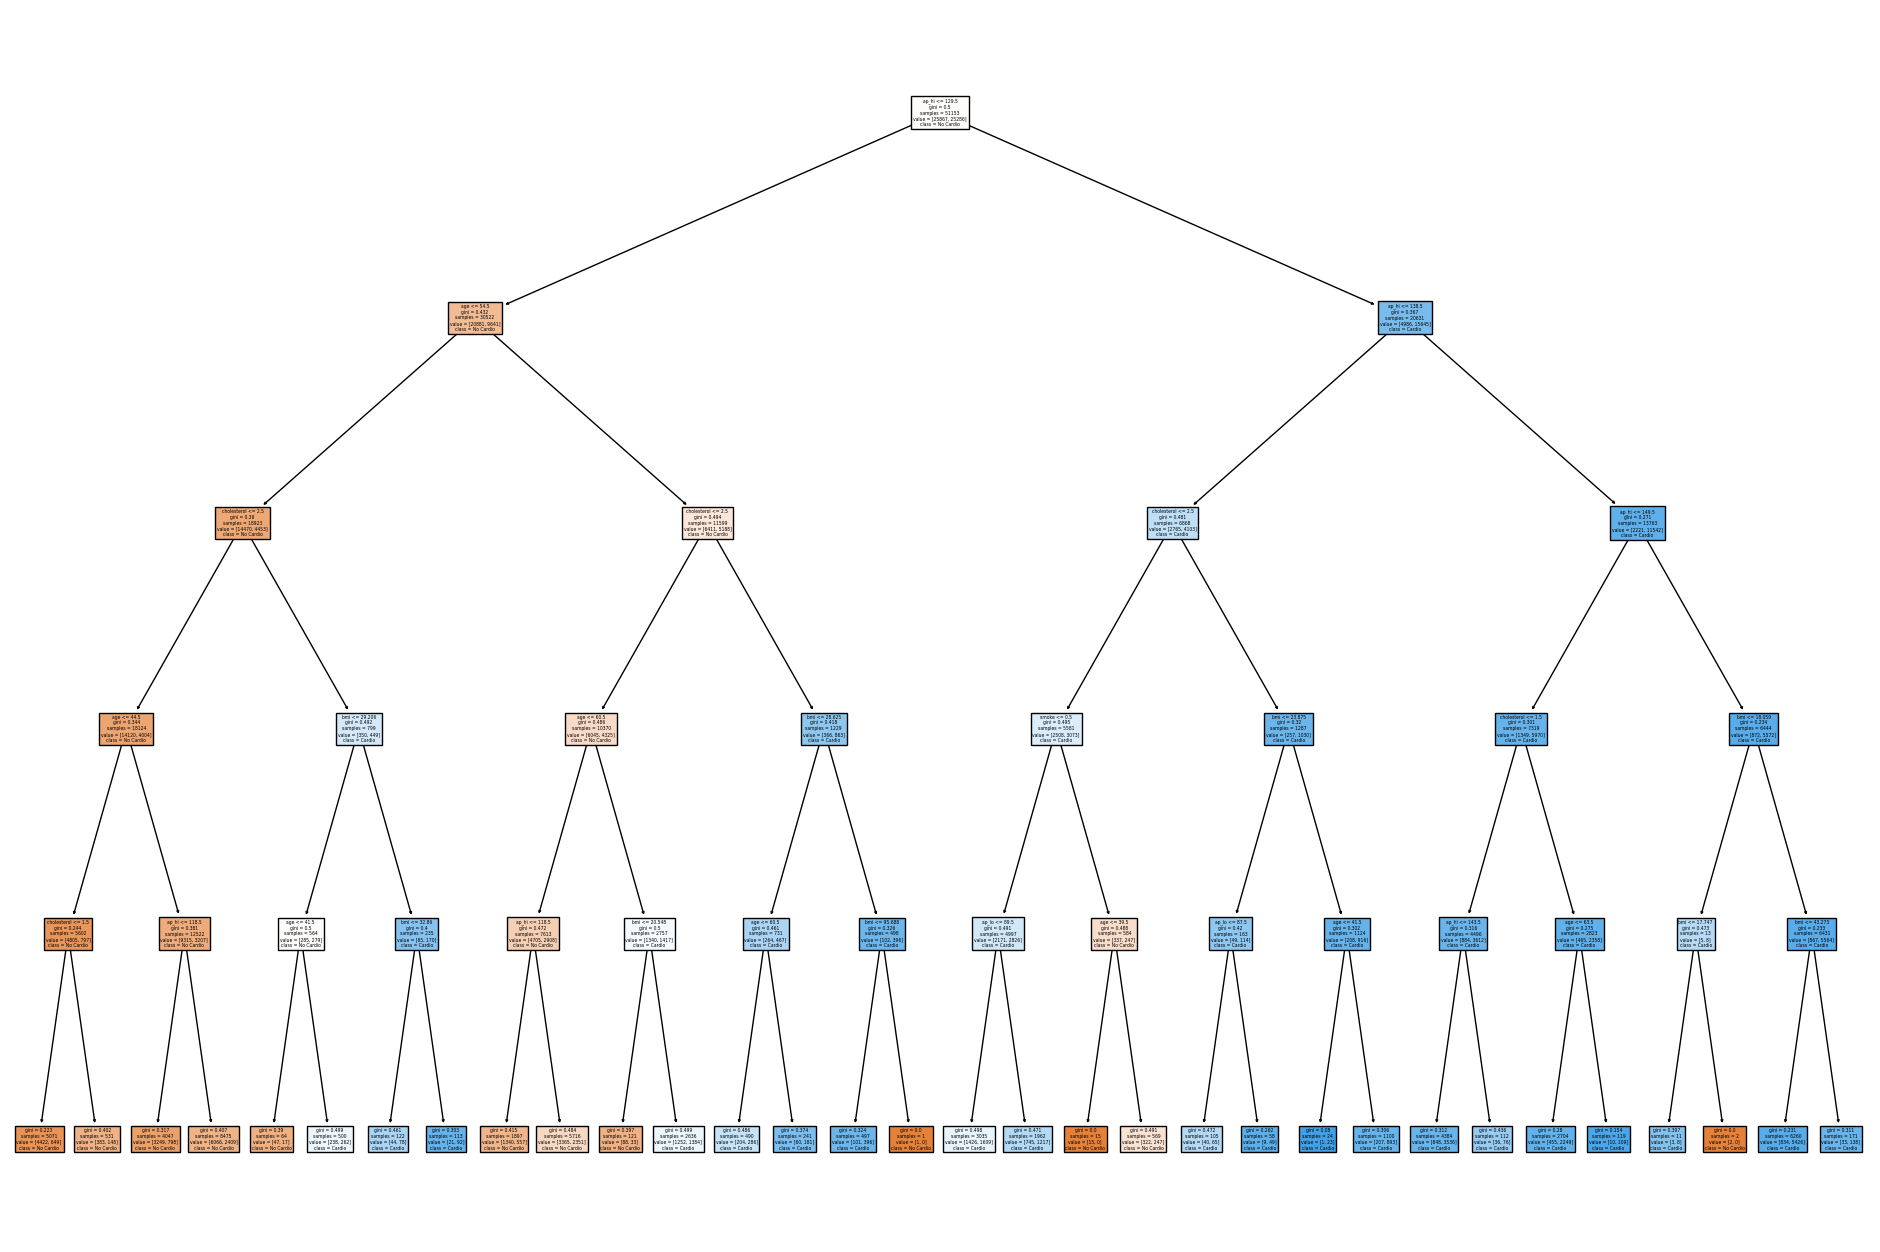

In [57]:
plt.figure(figsize=(24, 16))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Cardio', 'Cardio'], max_depth=5)
plt.show()

In [58]:
Y_pred = clf.predict(X_test)

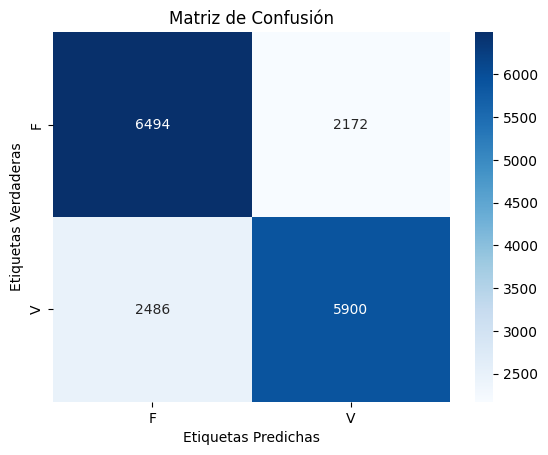

In [59]:
# Calcula la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

# Grafica la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['F', 'V'], yticklabels=['F', 'V'])

# Etiqueta los ejes y el título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')

# Muestra la matriz de confusión
plt.show()

In [60]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(Y_test, Y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[6494 2172]
 [2486 5900]]
True positives: 5900
True negatives: 6494
False positives: 2172
False negative: 2486
Precision:72.68355618109312%
Sensibilidad:70.35535416169807%
Especificidad:74.93653357950612%


In [61]:
scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')

In [62]:
print("Precisión promedio: {:.4f}".format(scores.mean()))
print("Desviación estándar de la precisión:",(scores.std()))

Precisión promedio: 0.7295
Desviación estándar de la precisión: 0.0029285218206867797


Para este último modelo **Arboles de decisión** nos dimos cuenta que es el que mejor lo hace, ya que tiene una precisión validad por kfold de 72.95% es el que mejor se comporta, agregando que es el más rápido de todos. Este algoritmo es el que mejor se comportó al momento de predecir si nuestros pacientes tienen riesgo de sufrir una enfermedad cardiovascular o no.

### Conclusiones

1. Lo primero que se pensó al momento de tener este dataset fue utilizar una regresión linear simple, sin embargo, sus salidas bianrias y la poca correlación entre variables lo complicó un poco.
2. El algoritmo de Arboles de decisión fue el que tuvo la mejor precisión de todos, cabe mencionar que también es el que se ajusta y predice más rápido, además de que este algoritmo no nos lo "recomendó" lazyPredict.
3. El dataset está compuesto en su mayoría de personas que no toman y no fuman, sería interesante ver como se comportan los modelos si tenemos un dataset de personas con estos hábitos.
4. La ayuda de un profesional de la salud fue de gran utilidad al momento de seleccionar qué variables son coherentes en nuestro dataset y cuales podíamos eliminar sin afectar el funcionamiento del mismo. Queda comprobado que un especialista en los equipos de Data es necesario para conocer el problema y dar solución.
5. Así mismo al tratarse de un modelo no preciso al 100% y estar enfocado a la indusria de la salud, el proyecto intenta predecir si existe algún RIESGO, mas no dar un diagnóstico certero.

### Desarrolladores

* Juan José Ramírez López
* Edgar Flores Hernández
* Alondra Muñoz Trinidad
* Scarlett Sugeily Hernández Martínez
* Alfonso Garcia Ortiz
* Karina Eraldi Serrano Pérez